In [3]:
import sys
sys.path.append(r'/hr-fs02/hr_projekte/Pol-InSAR_InfoRetrieval/10_users/mans_is/PyPolSAR')

In [4]:
import rioxarray
import rasterio as rio
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
from shapely.geometry import box, mapping
from scipy import ndimage
from pypolsar import geo
import pprint


In [5]:
import h5py

from pypolsar import polsar
import matplotlib.pyplot as plt

from pypolsar import utils, plot
from pypolsar import polsar
from pypolsar.polsar import decomposition

from pypolsar.stats.timer import Timer
from pathlib import Path
import pypolsar

import seaborn as sns
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import PercentFormatter
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


In [6]:
from pathlib import Path

process_path = Path('./../data/processed/')
fig_save = Path("./../figures/")

In [7]:
shape =list( process_path.glob('./**/*.shp'))
shape_sorted = sorted((shape))

for i in range(len(shape_sorted)):
    print(i, "\t", shape_sorted[i].name)


0 	 Ecological_classification_Herschel_Island.shp
1 	 gis_osm_landuse_a_free.shp
2 	 gis_osm_water_a_free.shp


<AxesSubplot:>

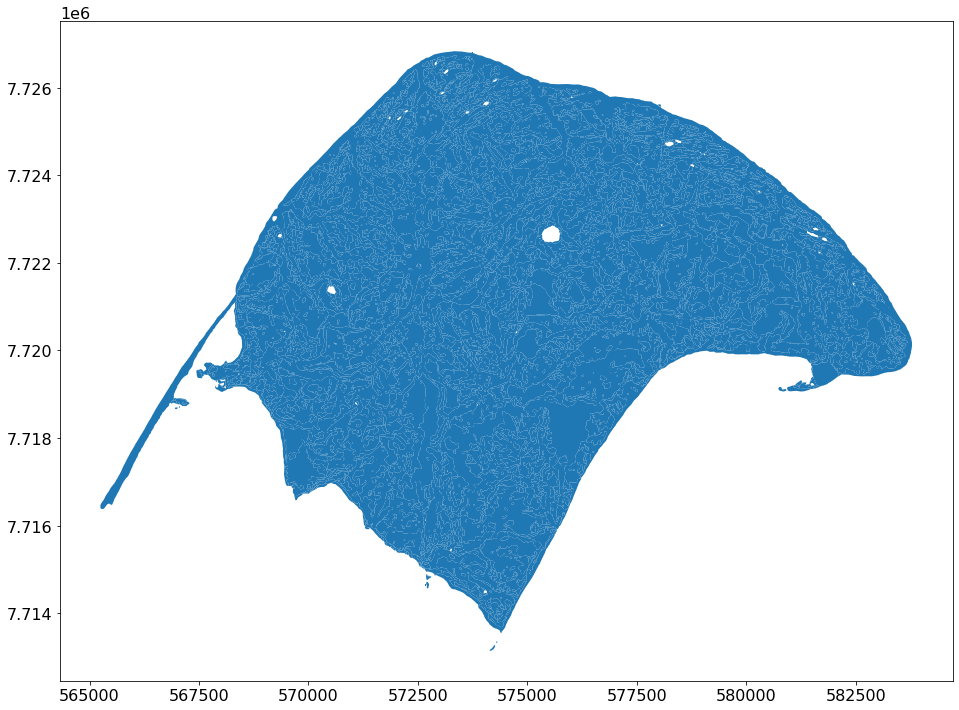

In [8]:
land = gpd.read_file(shape_sorted[0])
land.plot()

<AxesSubplot:>

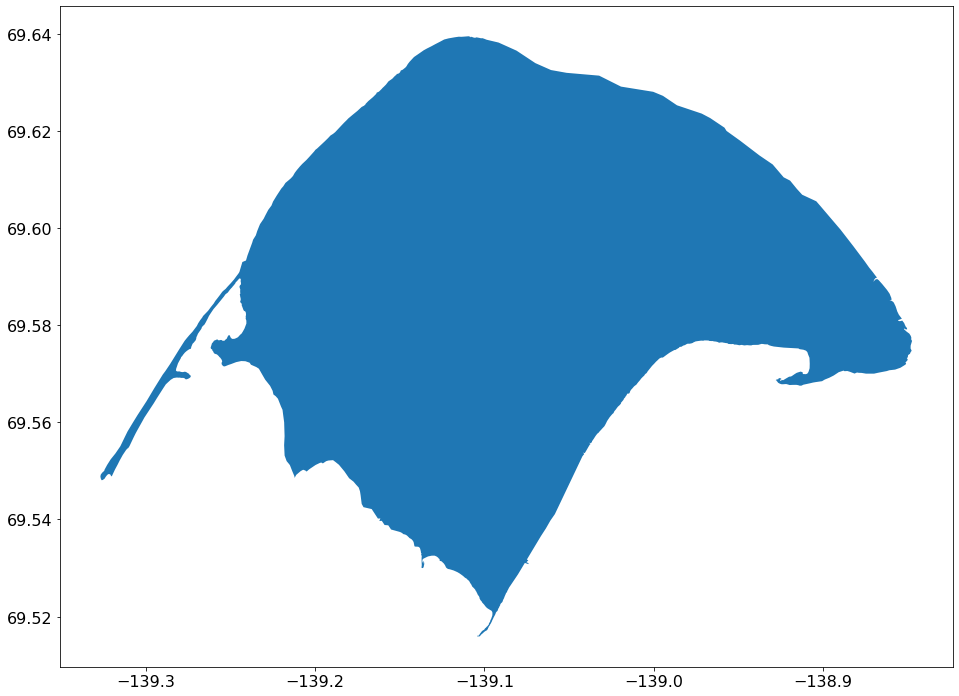

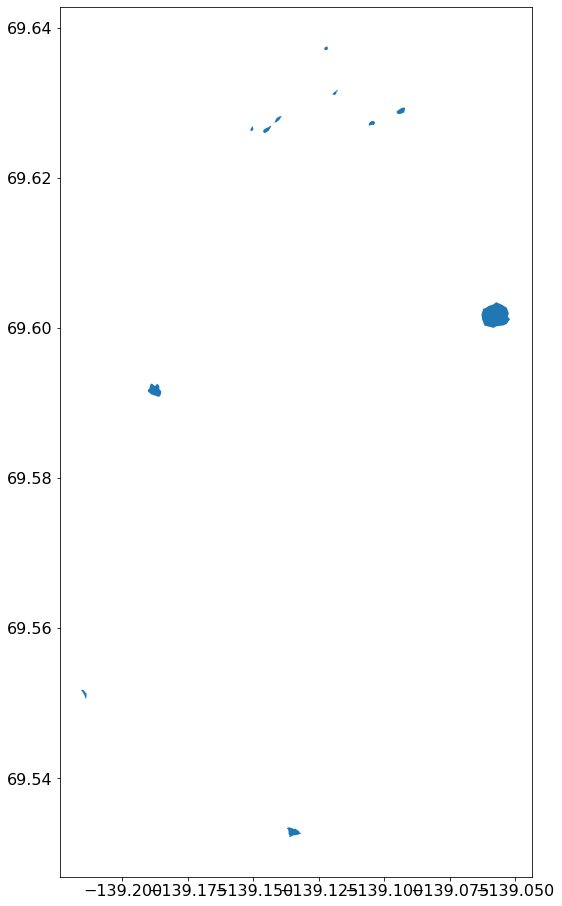

In [20]:
land_mask = gpd.read_file(shape_sorted[1])
land_mask.plot()
water_mask = gpd.read_file(shape_sorted[2])
water_mask.plot()


<GeoAxesSubplot:>

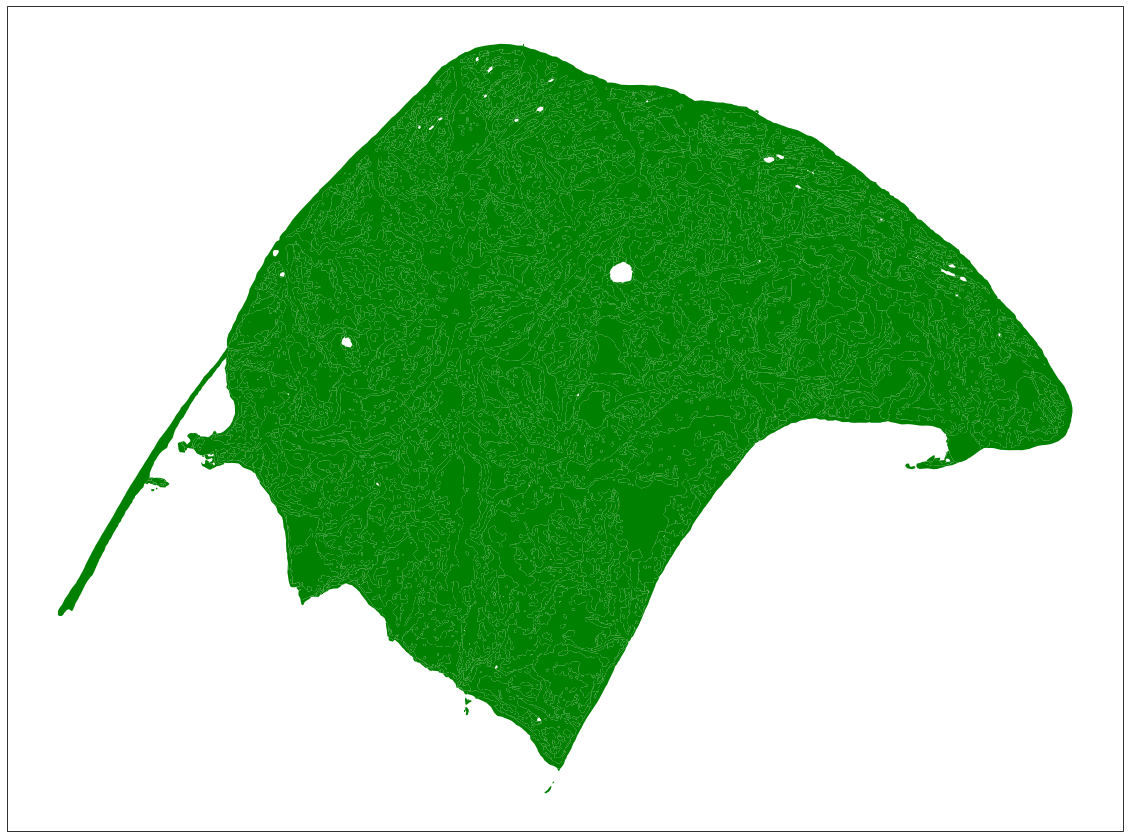

In [18]:
from cartopy import crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

extent = [-139.35, -138.8, 69.51,  69.65]          # Extent of Herschel Island in Lat/Long
crs_epsg = ccrs.epsg('3857')
# df_epsg = ecological_classes.to_crs(epsg='3857')


# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': crs_epsg},
                        figsize=(20, 20))

land.plot(ax=axs, color='green')

In [ ]:
legend=True,
             legend_kwds={'label': "SOC storage ($ in \, kg \, m^{-2}$)",
                            'orientation': "horizontal", 'shrink': 0.4,
                             'anchor': (0.0, -0.1)}) 

<GeoAxesSubplot:>

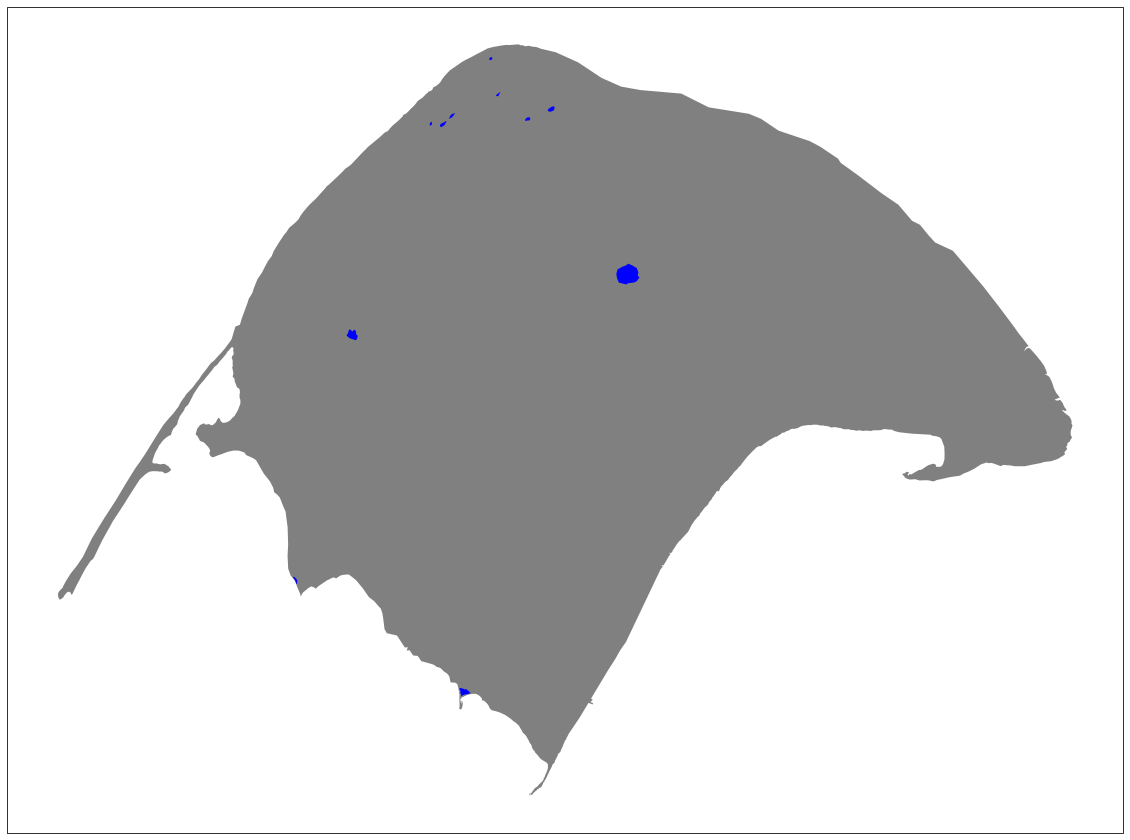

In [25]:
from cartopy import crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

extent = [-139.35, -138.8, 69.51,  69.65]          # Extent of Herschel Island in Lat/Long
crs_epsg = ccrs.epsg('3857')
# df_epsg = ecological_classes.to_crs(epsg='3857')


# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': crs_epsg},
                        figsize=(20, 20))

land_mask.plot(ax=axs, legend=True, color='gray' ,
             legend_kwds={'label':"land"})
water_mask.plot(ax=axs, legend=True, color='blue',
             legend_kwds={'label':"water"})

<AxesSubplot:>

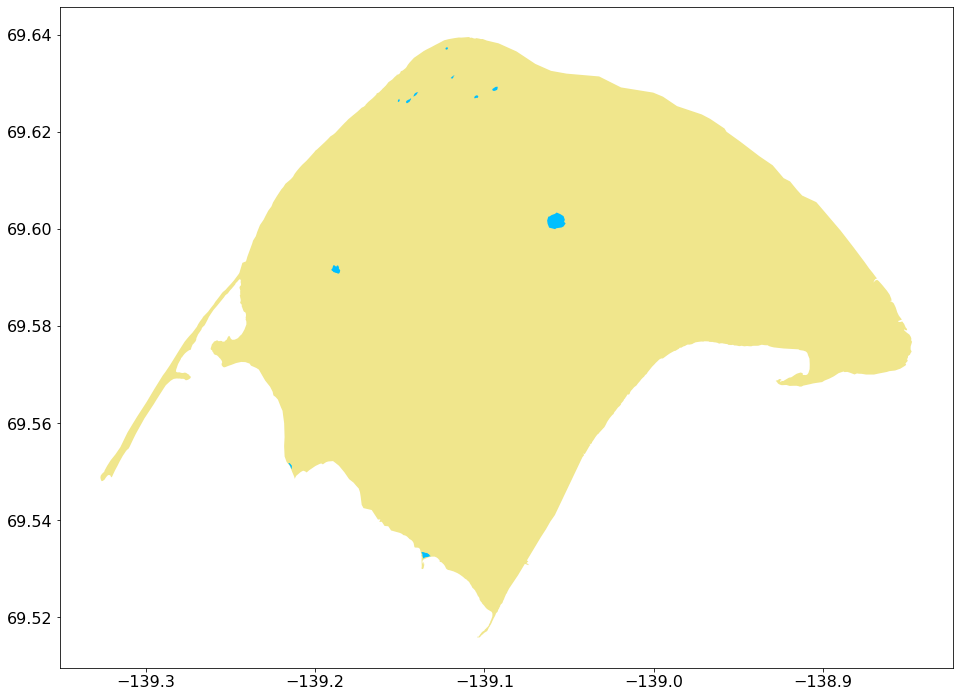

In [34]:
ax = land_mask.plot(color="khaki", legend=True,)
water_mask.plot(ax=ax, color="deepskyblue", legend=True,) 

<AxesSubplot:>

<Figure size 1152x1152 with 0 Axes>